<a href="https://colab.research.google.com/github/Arpitkamal/Deep-learning-Sigmoid-Neuron/blob/master/SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Sigmoid Function

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

$S_{w, b}(x) = \frac{1}{1+e^{-wx + b}}$

In [0]:
def sigmoid(x, w, b):
  return 1/(1+np.exp(-(w*x + b)))

In [3]:
sigmoid(1, 0.5, 0)

0.6224593312018546

In [0]:
w = 0.9    # responsible for the shape 
b = 0.1    # if we increase b it will shift towards right side
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

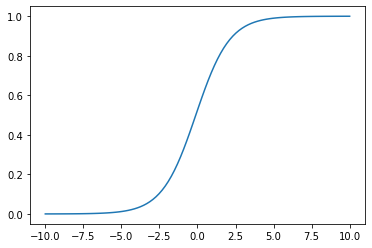

In [5]:
plt.plot(X,Y)
plt.show()

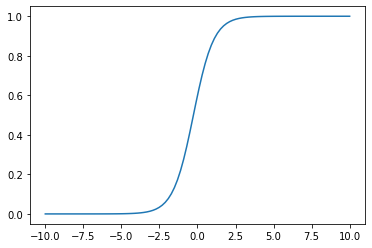

In [6]:
w = 1.5     #@param {type: "slider", min: -2, max: 2, step:0.1} 
b = 0.4     #@param {type: "slider", min: -2, max: 2, step:0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)
plt.plot(X,Y)
plt.show()

**W - Controlling the rate at which it falling from one extreme to another extreme**

**B - Controlling position of this fall w.r.t 0**

$S_{W_1,W_2,b}(x_1,x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [0]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [8]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [0]:
from mpl_toolkits import mplot3d

In [62]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)

print(x.shape, y.shape, X.shape, Y.shape)

(100,) (100,) (100, 100) (100, 100)


In [0]:
w1 = 0.5
w2 = 0.5
b = 1
Y1 = sigmoid_2d(X, Y, w1, w2, b)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

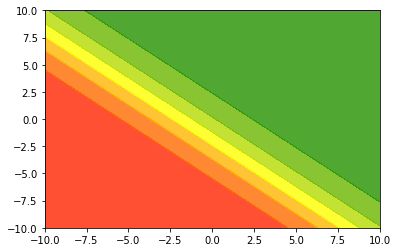

In [73]:
plt.contourf(X, Y, Y1, cmap = my_cmap, alpha = 0.8)
plt.show()

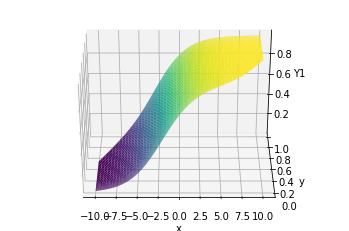

In [30]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Y1, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Y1');

ax.view_init(30, 270)

# Compute Loss for for Given Dataset

In [0]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

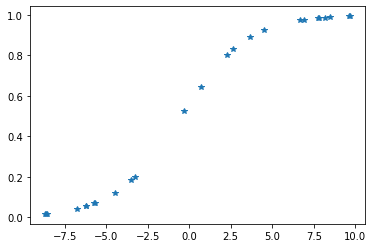

In [34]:
plt.plot(X, Y, '*')
plt.show()

In [0]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est)) **2
  return loss  

In [0]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

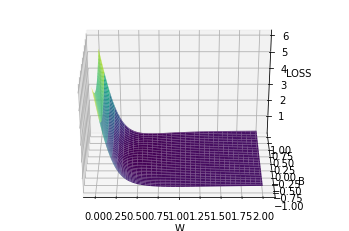

In [57]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('LOSS');


ax.view_init(30, 270)     # 180 bias prospective, 270 weight prospective

In [0]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [59]:
print(i, j)

63 25


In [60]:
print(WW[i, j], BB[i, j])

0.5 0.26


# Class for Sigmoid Neuron